# Objective
    1) Remove test images without defect from Step1
    2) Remove train images without defect (Only use the train images with defect(s) for training)
    2) Predict Mask

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

# df_test
## Remove test images without defect from Step1

In [2]:
test = pd.read_csv('./output/submission_step1_gray.csv')

print("test.shape:", test.shape)
test.head()

test.shape: (1801, 2)


,ImageId,defect
0,004f40c73.jpg,False
1,006f39c41.jpg,False
2,00b7fb703.jpg,True
3,00bbcd9af.jpg,True
4,0108ce457.jpg,False


In [3]:
test1 = test[test['defect']==True]    #predict
test0 = test[test['defect']==False]   #done

print('test1.shape:', test1.shape)
print('test0.shape:', test0.shape)

test1.shape: (895, 2)
test0.shape: (906, 2)


In [4]:
# test2 = pd.concat([test1 ,test0], axis=0)
# test2 = test2.sort_index()

# print("test2.shape:", test2.shape)
# test2.head()

In [5]:
sample_submission = pd.read_csv('./input/sample_submission.csv')

print("sample_submission.shape:", sample_submission.shape)
sample_submission.head()

sample_submission.shape: (7204, 2)


,ImageId_ClassId,EncodedPixels
0,004f40c73.jpg_1,1 1
1,004f40c73.jpg_2,1 1
2,004f40c73.jpg_3,1 1
3,004f40c73.jpg_4,1 1
4,006f39c41.jpg_1,1 1


In [6]:
sample_submission['ImageId'] = sample_submission['ImageId_ClassId'].str[:-2]
sample_submission['ClassId'] = sample_submission['ImageId_ClassId'].str[-1:]

sample_submission.head()

,ImageId_ClassId,EncodedPixels,ImageId,ClassId
0,004f40c73.jpg_1,1 1,004f40c73.jpg,1
1,004f40c73.jpg_2,1 1,004f40c73.jpg,2
2,004f40c73.jpg_3,1 1,004f40c73.jpg,3
3,004f40c73.jpg_4,1 1,004f40c73.jpg,4
4,006f39c41.jpg_1,1 1,006f39c41.jpg,1


In [7]:
sample_submission = sample_submission.join(test.set_index('ImageId'), on='ImageId')
sample_submission = sample_submission[['ImageId_ClassId','ImageId','ClassId','defect','EncodedPixels']]

print('sample_submission.shape:', sample_submission.shape)
sample_submission.head(10)

sample_submission.shape: (7204, 5)


,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
0,004f40c73.jpg_1,004f40c73.jpg,1,False,1 1
1,004f40c73.jpg_2,004f40c73.jpg,2,False,1 1
2,004f40c73.jpg_3,004f40c73.jpg,3,False,1 1
3,004f40c73.jpg_4,004f40c73.jpg,4,False,1 1
4,006f39c41.jpg_1,006f39c41.jpg,1,False,1 1
5,006f39c41.jpg_2,006f39c41.jpg,2,False,1 1
6,006f39c41.jpg_3,006f39c41.jpg,3,False,1 1
7,006f39c41.jpg_4,006f39c41.jpg,4,False,1 1
8,00b7fb703.jpg_1,00b7fb703.jpg,1,True,1 1
9,00b7fb703.jpg_2,00b7fb703.jpg,2,True,1 1


In [8]:
sample_submission1 = sample_submission[sample_submission['defect']==True]    #predict
sample_submission0 = sample_submission[sample_submission['defect']==False]   #done

print('sample_submission1.shape:', sample_submission1.shape)
print('sample_submission0.shape:', sample_submission0.shape)

sample_submission1.shape: (3580, 5)
sample_submission0.shape: (3624, 5)


In [9]:
sample_submission0['EncodedPixels'] = np.nan
sample_submission0.head()

,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
0,004f40c73.jpg_1,004f40c73.jpg,1,False,NaN
1,004f40c73.jpg_2,004f40c73.jpg,2,False,NaN
2,004f40c73.jpg_3,004f40c73.jpg,3,False,NaN
3,004f40c73.jpg_4,004f40c73.jpg,4,False,NaN
4,006f39c41.jpg_1,006f39c41.jpg,1,False,NaN


In [10]:
# sample_submission2 = pd.concat([sample_submission1 ,sample_submission0], axis=0)
# sample_submission2 = sample_submission2.sort_index()

# print("sample_submission2.shape:", sample_submission2.shape)
# sample_submission2.head()

# df_train

In [11]:
raw_train = pd.read_csv('./input/train.csv')
print("raw_train.shape:", raw_train.shape)
raw_train.head()

raw_train.shape: (50272, 2)


,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


## 1) Split into ImageId, ClassId

In [12]:
raw_train['ImageId'] = raw_train['ImageId_ClassId'].str[:-2]
raw_train['ClassId'] = raw_train['ImageId_ClassId'].str[-1:]
raw_train['defect'] = raw_train['EncodedPixels'].notnull()

raw_train = raw_train[['ImageId','ClassId','defect','EncodedPixels']]

In [13]:
print('{} = no. of train_images * 4'.format(raw_train.shape[0]))
print('raw_train.shape:', raw_train.shape)
raw_train.head()

50272 = no. of train_images * 4
raw_train.shape: (50272, 4)


,ImageId,ClassId,defect,EncodedPixels
0,0002cc93b.jpg,1,True,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,False,NaN
2,0002cc93b.jpg,3,False,NaN
3,0002cc93b.jpg,4,False,NaN
4,00031f466.jpg,1,False,NaN


## 2) Remove train images without defect
    Only use the train images with defect(s) for training

In [14]:
train = raw_train[raw_train['defect']==True].reset_index(drop=True)

print('There are {} masks in total'.format(train.shape[0]))
print('train.shape:', train.shape)
train.head()

There are 7095 masks in total
train.shape: (7095, 4)


,ImageId,ClassId,defect,EncodedPixels
0,0002cc93b.jpg,1,True,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,True,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,True,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,True,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,True,229501 11 229741 33 229981 55 230221 77 230468...


3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64


Text(0, 0.5, 'No. of images')

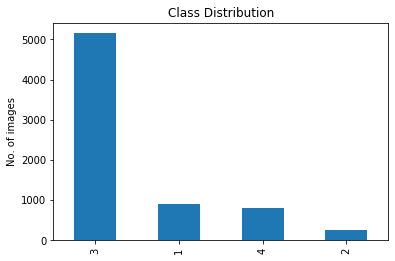

In [15]:
print(train['ClassId'].value_counts())   # for checking

train['ClassId'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.ylabel("No. of images")

# Split train into y_train, y_val 

In [16]:
VALIDATION_SPLIT = 0.1

In [17]:
from sklearn.model_selection import train_test_split

y_train, y_val = train_test_split(train, test_size=VALIDATION_SPLIT, random_state=63)

In [18]:
print('y_train.shape:', y_train.shape)
y_train.head()

y_train.shape: (6385, 4)


,ImageId,ClassId,defect,EncodedPixels
1323,3035a46b7.jpg,3,True,160179 1 160433 4 160687 7 160942 10 161196 13...
6598,ed8d0e78c.jpg,3,True,257793 128 258049 255 258305 255 258561 255 25...
1607,3ade75b6e.jpg,3,True,2933 1 3187 3 3441 6 3695 8 3949 11 4203 13 44...
4208,99224c3d5.jpg,4,True,271371 2 271626 7 271880 13 272135 18 272390 2...
4495,a41f575ff.jpg,3,True,53505 32 53761 96 54017 160 54273 224 54529 48...


3    4644
1     803
4     718
2     220
Name: ClassId, dtype: int64
Ratio: 0.034456


Text(0, 0.5, 'No. of images')

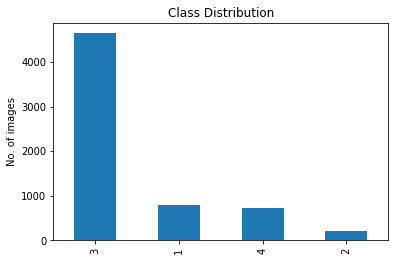

In [19]:
print(y_train['ClassId'].value_counts())   # for checking
print('Ratio: {:f}'.format(y_train['ClassId'].value_counts()[3]/y_train['ClassId'].value_counts().sum()))

y_train['ClassId'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.ylabel("No. of images")

In [20]:
print('y_val.shape:', y_val.shape)
y_val.head()

y_val.shape: (710, 4)


,ImageId,ClassId,defect,EncodedPixels
1050,25f9a8622.jpg,4,True,171 10 408 30 646 48 883 68 1129 78 1385 79 16...
4771,ad6fb4fab.jpg,3,True,344835 127 345091 254 345347 254 345603 254 34...
5611,ca02e9e92.jpg,3,True,249025 64 249153 6592 352982 43 353153 128 353...
1253,2dd290c91.jpg,3,True,281593 8 281834 23 282076 37 282317 52 282558 ...
2663,62b0a31ba.jpg,3,True,266721 32 266913 96 267105 160 267297 23754 29...


3    506
1     94
4     83
2     27
Name: ClassId, dtype: int64
Ratio: 0.038028


Text(0, 0.5, 'No. of images')

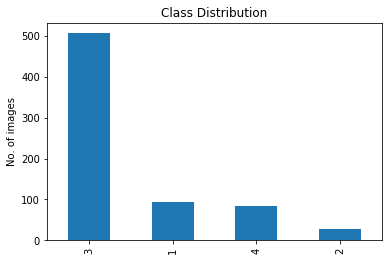

In [21]:
print(y_val['ClassId'].value_counts())   # for checking
print('Ratio: {:f}'.format(y_val['ClassId'].value_counts()[3]/y_val['ClassId'].value_counts().sum()))

y_val['ClassId'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.ylabel("No. of images")

# 1) Train & val Data Generator

In [22]:
BATCH_SIZE = 16

In [23]:
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, df, target_df=None, mode='fit',
                 base_path = './input/train_images/',
                 batch_size = 32, 
                 img_size = (256,1600),    # image original shape
                 resized_size = (256,256),
                 n_channels = 1,           # grayscale
                 n_classes = 4,            # 4 classes of masks
                 random_state = 2019, 
                 shuffle = True):
        self.img_size = img_size
        self.resized_size = resized_size
        self.batch_size = batch_size
        self.df = df
        self.mode = mode
        self.base_path = base_path
        self.target_df = target_df
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.random_state = random_state
        
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_batch = [self.list_IDs[k] for k in indexes]
        
        X = self.__generate_X(list_IDs_batch)
        
        if self.mode == 'fit':
            y = self.__generate_y(list_IDs_batch)
            return X, y
        
        elif self.mode == 'predict':
            return X

        else:
            raise AttributeError('The mode parameter should be set to "fit" or "predict".')
        
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.seed(self.random_state)
            np.random.shuffle(self.indexes)
    
    def __generate_X(self, list_IDs_batch):
        'Generates images'
        # Initialization
        X = np.empty((self.batch_size, *self.resized_size, self.n_channels))
        
        # Generate data
        for i, ID in enumerate(list_IDs_batch):
            im_name = self.df['ImageId'].iloc[ID]
            img_path = f"{self.base_path}/{im_name}"
            img = self.__load_grayscale(img_path)
            #img = self.__load_rgb(img_path)
            
            # Store samples
            X[i,] = img

        return X
    
    def __generate_y(self, list_IDs_batch):
        'Generate masks'
        y = np.empty((self.batch_size, *self.resized_size, self.n_classes), dtype=int)
        
        for i, ID in enumerate(list_IDs_batch):
            im_name = self.df['ImageId'].iloc[ID]
            image_df = self.target_df[self.target_df['ImageId'] == im_name]
            
            rles = image_df['EncodedPixels'].values
            masks = build_masks(rles, input_shape=self.img_size)
            
            y[i, ] = masks

        return y
    
    def __load_grayscale(self, img_path):
        'grayscale (height, width, 1)'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.resized_size)         # training faster than (256,1600) & fewer memory required
        img = img.astype(np.float32) / 255.
        img = np.expand_dims(img, axis=-1)

        return img
    
    def __load_rgb(self, img_path):
        'rgb (height, width, 3)'
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, self.resized_size)
        img = img.astype(np.float32) / 255.

        return img

Using TensorFlow backend.


In [24]:
# Useful function for Data Generator
def rle2mask(rle, imgshape = (256,1600)):
    width = imgshape[0]
    height= imgshape[1]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return np.flipud( np.rot90( mask.reshape(height, width), k=1 ) )

def build_masks(rles, input_shape = (256,1600)):
    depth = len(rles)
    height, width = input_shape
    masks = np.zeros((height, width, depth))
    
    for i, rle in enumerate(rles):
        if type(rle) is str:
            masks[:, :, i] = rle2mask(rle, (height, width))
    
    return cv2.resize(masks, (256,256))

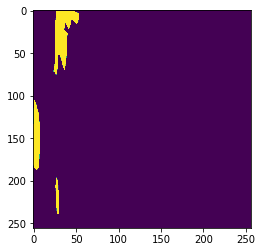

In [25]:
# Mask resize testing
masks = build_masks(y_val['EncodedPixels'].iloc[:5], (256,1600))
plt.imshow(masks[:,:,0])

In [26]:
train_datagen = DataGenerator(
    y_train.index,              # y_train.shape: (6385, 4)
    df = train,                 # train.shape: (7095, 4)       # y_train, y_val = train_test_split(train)
    target_df = raw_train,      # raw_train.shape: (50272, 4)
    batch_size = BATCH_SIZE,
    n_channels = 1              #grayscale=1, rgb=3
)

val_datagen = DataGenerator(
    y_val.index,                # y_val.shape: (710, 4)
    df = train,
    target_df = raw_train,
    batch_size = BATCH_SIZE,
    shuffle = False,
    n_channels = 1
)

# Model in Keras

In [27]:
import keras
from keras import backend as K
from keras.layers import Dropout, BatchNormalization, Flatten, Dense, GlobalMaxPooling2D
from keras.layers import UpSampling2D, Conv2D, Activation, LeakyReLU, Input, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.models import Model
from keras.applications import DenseNet121, Xception, InceptionResNetV2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential, load_model
from keras.optimizers import Adam
import tensorflow as tf

In [28]:
# Metric: dice_coef

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [29]:
KEEP_PROB = 0.3

In [30]:
def Create_model():
    
    input_shape = (256,256,1)   # grayscale=(256,256,1), rgb=(256,256,3)
    
    inputs = Input(input_shape)

    c1 = Conv2D(8, (3, 3), padding='same') (inputs)
    c1 = BatchNormalization() (c1)
    c1 = Activation('elu') (c1)
    c1 = Conv2D(8, (3, 3), padding='same') (c1)
    c1 = BatchNormalization() (c1)
    c1 = Activation('elu') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(KEEP_PROB) (p1)

    c2 = Conv2D(16, (3, 3), padding='same') (p1)
    c2 = BatchNormalization() (c2)
    c2 = Activation('elu') (c2)
    c2 = Conv2D(16, (3, 3), padding='same') (c2)
    c2 = BatchNormalization() (c2)
    c2 = Activation('elu') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(KEEP_PROB) (p2)

    c3 = Conv2D(32, (3, 3), padding='same') (p2)
    c3 = BatchNormalization() (c3)
    c3 = Activation('elu') (c3)
    c3 = Conv2D(32, (3, 3), padding='same') (c3)
    c3 = BatchNormalization() (c3)
    c3 = Activation('elu') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(KEEP_PROB) (p3)

    c4 = Conv2D(64, (3, 3), padding='same') (p3)
    c4 = BatchNormalization() (c4)
    c4 = Activation('elu') (c4)
    c4 = Conv2D(64, (3, 3), padding='same') (c4)
    c4 = BatchNormalization() (c4)
    c4 = Activation('elu') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(KEEP_PROB) (p4)

    c5 = Conv2D(64, (3, 3), padding='same') (p4)
    c5 = BatchNormalization() (c5)
    c5 = Activation('elu') (c5)
    c5 = Conv2D(64, (3, 3), padding='same') (c5)
    c5 = BatchNormalization() (c5)
    c5 = Activation('elu') (c5)
    p5 = MaxPooling2D(pool_size=(2, 2)) (c5)
    p5 = Dropout(KEEP_PROB) (p5)

    c55 = Conv2D(128, (3, 3), padding='same') (p5)
    c55 = BatchNormalization() (c55)
    c55 = Activation('elu') (c55)
    c55 = Dropout(KEEP_PROB) (c55)
    c55 = Conv2D(128, (3, 3), padding='same') (c55)
    c55 = BatchNormalization() (c55)
    c55 = Activation('elu') (c55)

    
    u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
    u6 = concatenate([u6, c5])
    c6 = Conv2D(64, (3, 3), padding='same') (u6)
    c6 = BatchNormalization() (c6)
    c6 = Activation('elu') (c6)
    c6 = Dropout(KEEP_PROB) (c6)
    c6 = Conv2D(64, (3, 3), padding='same') (c6)
    c6 = BatchNormalization() (c6)
    c6 = Activation('elu') (c6)

    u71 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
    u71 = concatenate([u71, c4])
    c71 = Conv2D(32, (3, 3), padding='same') (u71)
    c71 = BatchNormalization() (c71)
    c71 = Activation('elu') (c71)
    c71 = Dropout(KEEP_PROB) (c71)
    c61 = Conv2D(32, (3, 3), padding='same') (c71)
    c61 = BatchNormalization() (c61)
    c61 = Activation('elu') (c61)

    u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(32, (3, 3), padding='same') (u7)
    c7 = BatchNormalization() (c7)
    c7 = Activation('elu') (c7)
    c7 = Dropout(KEEP_PROB) (c7)
    c7 = Conv2D(32, (3, 3), padding='same') (c7)
    c7 = BatchNormalization() (c7)
    c7 = Activation('elu') (c7)

    u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(16, (3, 3), padding='same') (u8)
    c8 = BatchNormalization() (c8)
    c8 = Activation('elu') (c8)
    c8 = Dropout(KEEP_PROB) (c8)
    c8 = Conv2D(16, (3, 3), padding='same') (c8)
    c8 = BatchNormalization() (c8)
    c8 = Activation('elu') (c8)

    u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(8, (3, 3), padding='same') (u9)
    c9 = BatchNormalization() (c9)
    c9 = Activation('elu') (c9)
    c9 = Dropout(KEEP_PROB) (c9)
    c9 = Conv2D(8, (3, 3), padding='same') (c9)
    c9 = BatchNormalization() (c9)
    c9 = Activation('elu') (c9)
    
    outputs = Conv2D(4, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
    
    model.summary()
    
    return model

In [31]:
def Load_model():
    keras.backend.clear_session()
    
    dependencies = {
     'dice_coef': dice_coef
    }
    
    model = load_model('./model/step2_gray_unet_valloss_0.0285.h5', custom_objects = dependencies)
    #model.layers[0].trainable = False
    
    adam = Adam(lr=0.00000001)
    
    model.compile(
            optimizer = adam,
            loss = 'binary_crossentropy',
            metrics = [dice_coef])
    
    model.summary()
    
    return model

In [32]:
%%time
# Create model
# model = Create_model()

# Load model
model = Load_model()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________

In [27]:
# Define callbacks (EarlyStopping, ReduceLROnPlateau, ModelCheckpoint)
# ModelCheckpoint: Save the (best) model weights after every epoch

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
             EarlyStopping(monitor='val_loss', patience=6, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=2, cooldown=1, min_lr=1e-6),
             ModelCheckpoint(filepath='./model/step2_rgb_unet.h5', monitor='val_loss',
                             save_best_only=True, save_weights_only=False)
            ]

In [28]:
EPOCHS = 1

# train_steps = int(np.ceil(y_train.shape[0] / BATCH_SIZE))
# validation_steps = int(np.ceil(y_val.shape[0] / BATCH_SIZE))
# print('train_steps:', train_steps)                         # len(train_generator)
# print('validation_steps:', validation_steps)               # len(validation_generator)

In [29]:
%%time
# Train the model

history = model.fit_generator(
                train_datagen,
                #steps_per_epoch = train_steps,
                epochs = EPOCHS,
                validation_data = val_datagen,
                #validation_steps = validation_steps,
                #callbacks = callbacks,
                workers=4,
                max_queue_size=10
                )

Epoch 1/1


KeyboardInterrupt: 

In [31]:
# Save model
model.save('./model/step2_unet_valloss0.0325.h5')

In [27]:
print(history.history.keys())

NameError: name 'history' is not defined

# Model Evaluation

## Plot Learning rate

learning rate: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0006, 0.0006, 0.0006, 0.0006, 0.00036, 0.00036, 0.000216, 0.000216, 0.000216, 0.000216, 0.000216, 0.0001296, 0.0001296, 0.0001296, 7.776e-05, 7.776e-05, 4.6656e-05, 4.6656e-05, 4.6656e-05, 4.6656e-05, 4.6656e-05, 4.6656e-05, 4.6656e-05, 2.7993601e-05, 2.7993601e-05, 1.679616e-05, 1.679616e-05]


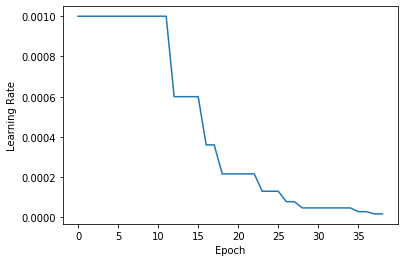

In [41]:
print('learning rate:', history.history['lr'])
plt.plot(history.history['lr'])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

## 1) Plot loss and accuracy (train, val)

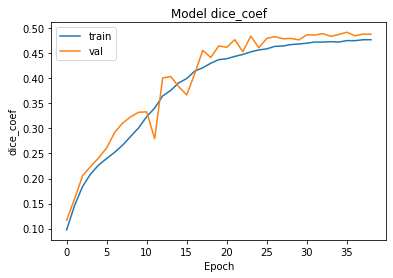

In [42]:
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Model dice_coef')
plt.ylabel('dice_coef')
plt.show()

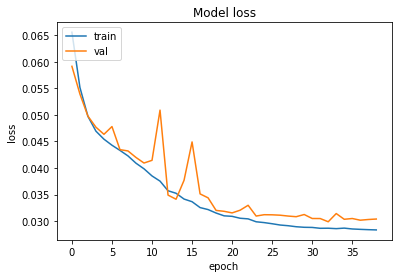

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 2) Loss and dice_coef (val)

In [27]:
%%time

# val_datagen.reset()
# score = model.evaluate(x_val, y_val)
score = model.evaluate_generator(val_datagen, 
                                 #steps = validation_steps
                                )
print("loss:", score[0])
print("metric (dice_coef): ", score[1])

loss: 0.028532357265551884
metric (dice_coef):  0.5238481389151679
Wall time: 21.1 s


## 3) Validation Mask Prediction

In [28]:
%%time

# validation_generator.reset()
# y_val_pred = model.predict_classes(x_val)
y_val_pred_prob = model.predict_generator(val_datagen, 
                                          #steps = validation_steps
                                         )

Wall time: 12.4 s


In [29]:
print('y_val_pred_prob.shape:', y_val_pred_prob.shape)
y_val_pred_prob

y_val_pred_prob.shape: (720, 256, 256, 4)


array([[[[4.15235758e-04, 3.70740891e-05, 1.22388601e-02,
          2.04569101e-03],
         [3.41594219e-04, 3.66866589e-05, 1.34363174e-02,
          2.84206867e-03],
         [7.46369362e-04, 7.67409801e-05, 1.91718042e-02,
          3.46770883e-03],
         ...,
         [1.47491693e-04, 2.32458115e-05, 3.16393375e-03,
          3.97592783e-04],
         [1.40160322e-04, 2.00569630e-05, 3.98665667e-03,
          5.43355942e-04],
         [3.18378210e-04, 3.35872173e-05, 7.26649165e-03,
          9.71168280e-04]],

        [[2.72572041e-04, 2.36630440e-05, 1.06760263e-02,
          2.18886137e-03],
         [1.99228525e-04, 2.70903111e-05, 1.08258724e-02,
          3.05628777e-03],
         [4.86791134e-04, 6.42240047e-05, 1.60399973e-02,
          3.65275145e-03],
         ...,
         [3.72231007e-05, 7.86781311e-06, 6.48200512e-04,
          8.12113285e-05],
         [3.74913216e-05, 7.36117363e-06, 1.03446841e-03,
          1.47402287e-04],
         [1.31607056e-04, 1.7613172

In [30]:
y_val_pred = (y_val_pred_prob > 0.5).astype(np.uint8)
y_val_pred

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        ...,

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [31]:
index = 0

mask1_pred = y_val_pred[index, :, :, 0]
mask2_pred = y_val_pred[index, :, :, 1]
mask3_pred = y_val_pred[index, :, :, 2]
mask4_pred = y_val_pred[index, :, :, 3]

mask1_pred = cv2.resize(mask1_pred, (1600,256))
mask2_pred = cv2.resize(mask2_pred, (1600,256))
mask3_pred = cv2.resize(mask3_pred, (1600,256))
mask4_pred = cv2.resize(mask4_pred, (1600,256))

print('mask1_pred.shape:', mask1_pred.shape)
print('mask2_pred.shape:', mask2_pred.shape)
print('mask3_pred.shape:', mask3_pred.shape)
print('mask4_pred.shape:', mask4_pred.shape)

mask1_pred.shape: (256, 1600)
mask2_pred.shape: (256, 1600)
mask3_pred.shape: (256, 1600)
mask4_pred.shape: (256, 1600)


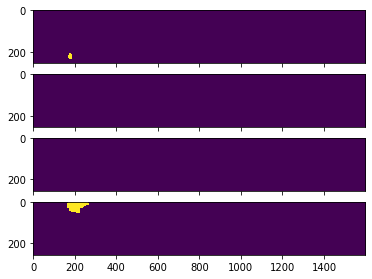

In [32]:
# Predict val masks
nrows = 4
ncols = 1

mask_pred = [mask1_pred, mask2_pred, mask3_pred, mask4_pred]

fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(7.5,4.5))
for row in range(nrows):
    i = row
    ax[row].imshow(mask_pred[i])

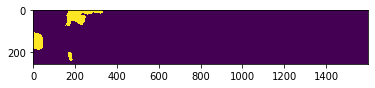

In [33]:
# True val mask
mask = rle2mask(y_val['EncodedPixels'].iloc[index])
plt.imshow(mask)

ImageId: 25f9a8622.jpg
ClassId: 4


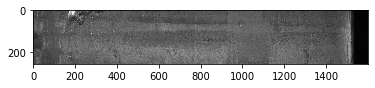

In [34]:
# Show val image
img_path = './input/train_images/'+str(y_val['ImageId'].iloc[index])
print('ImageId:', y_val['ImageId'].iloc[index])
print('ClassId:', y_val['ClassId'].iloc[index])
img = cv2.imread(img_path,
                 #cv2.IMREAD_GRAYSCALE
                )
plt.imshow(img)

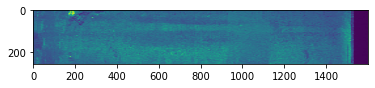

In [35]:
plt.imshow( cv2.resize( np.squeeze(val_datagen[0][0][index]) , (1600,256)) )

# val_datagen[0][0][0].shape: (256,256,1)
# first[]: no. of batch 45(iterate), second[]: {0: image(256,256,1), 1: masks(256,256,4)}, thrid[]: batch_size(0-15)

# Prediction

## Test Data Generator

In [33]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test1,
    directory='./input/test_images/',
    x_col='ImageId',
    target_size=(256, 256),
    color_mode = 'grayscale',
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

# # Method2 (same result)
# test_datagen = DataGenerator(
#         test1.index,                      # test1.shape: (895, 2)
#         df = test,                        # test.shape: (1801, 2)                # test1, test0 = test
#         target_df = sample_submission,    # sample_submission.shape: (7204, 5)   # 7204/4 = 1801
#         shuffle = False,
#         mode = 'predict',
#         base_path = './input//test_images/',
#         batch_size = 1,
#         n_classes = 4
# )

Found 895 validated image filenames.


In [34]:
test_steps = int(np.ceil(test1.shape[0] / BATCH_SIZE))           # no. of test_images / batch size
print('test_steps:', test_steps)                                             # len(test_generator)

test_steps: 56


In [35]:
%%time

test_datagen.reset()
y_test_pred_prob = model.predict_generator(test_datagen,
                                           steps = test_steps
                                          )

Wall time: 8.15 s


In [36]:
print('y_test_pred_prob.shape:', y_test_pred_prob.shape)
y_test_pred_prob

y_test_pred_prob.shape: (895, 256, 256, 4)


array([[[[2.96086073e-04, 3.37958336e-05, 7.37738609e-03,
          7.16745853e-04],
         [1.90883875e-04, 2.93254852e-05, 5.96633554e-03,
          5.07861376e-04],
         [3.28958035e-04, 5.19454479e-05, 6.46954775e-03,
          3.94433737e-04],
         ...,
         [1.63394213e-03, 9.26852226e-05, 6.74956739e-02,
          3.97539139e-03],
         [1.21062994e-03, 8.72015953e-05, 4.85207140e-02,
          4.08545136e-03],
         [1.17990375e-03, 7.58767128e-05, 3.88191044e-02,
          3.52653861e-03]],

        [[1.36792660e-04, 1.77025795e-05, 4.24122810e-03,
          3.29136848e-04],
         [6.56545162e-05, 1.61826611e-05, 2.86510587e-03,
          1.63763762e-04],
         [9.54270363e-05, 2.26795673e-05, 2.55328417e-03,
          9.32216644e-05],
         ...,
         [1.91664696e-03, 9.03308392e-05, 1.32300317e-01,
          4.86496091e-03],
         [1.13138556e-03, 8.41915607e-05, 8.23042691e-02,
          5.26109338e-03],
         [1.00994110e-03, 6.4671039

In [37]:
y_test_pred = (y_test_pred_prob > 0.5).astype(np.uint8)
y_test_pred

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        ...,

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [38]:
index = 1

mask1_pred = y_test_pred[index, :, :, 0]
mask2_pred = y_test_pred[index, :, :, 1]
mask3_pred = y_test_pred[index, :, :, 2]
mask4_pred = y_test_pred[index, :, :, 3]

mask1_pred = cv2.resize(mask1_pred, (1600,256))
mask2_pred = cv2.resize(mask2_pred, (1600,256))
mask3_pred = cv2.resize(mask3_pred, (1600,256))
mask4_pred = cv2.resize(mask4_pred, (1600,256))

print('mask1_pred.shape:', mask1_pred.shape)
print('mask2_pred.shape:', mask2_pred.shape)
print('mask3_pred.shape:', mask3_pred.shape)
print('mask4_pred.shape:', mask4_pred.shape)

mask1_pred.shape: (256, 1600)
mask2_pred.shape: (256, 1600)
mask3_pred.shape: (256, 1600)
mask4_pred.shape: (256, 1600)


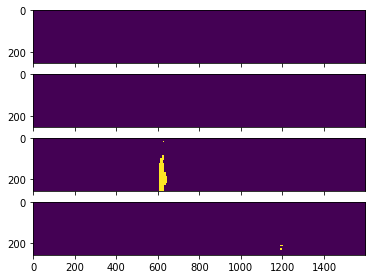

In [39]:
# Predict test masks
nrows = 4
ncols = 1

mask_pred = [mask1_pred, mask2_pred, mask3_pred, mask4_pred]

fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(7.5,4.5))
for row in range(nrows):
    i = row
    ax[row].imshow(mask_pred[i])

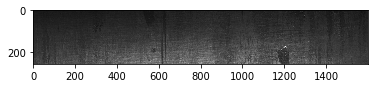

In [40]:
# Show test image
img_path = './input/test_images/'+str(test1['ImageId'].iloc[index])
img = cv2.imread(img_path,
                 #cv2.IMREAD_GRAYSCALE
                )
plt.imshow(img)

test_datagen[0][index].shape: (256, 256, 1)


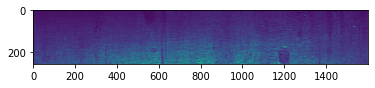

In [41]:
# image from test_datagen
print('test_datagen[0][index].shape:', test_datagen[0][index].shape)
#1st[]: [0:69] no. of batch    2nd[]: [0:15] no. of image in a batch

img = test_datagen[0][index]

plt.imshow( cv2.resize( np.squeeze(test_datagen[0][index]) , (1600,256)) )

# Submission

In [42]:
def mask2rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def build_rles(masks):
    width, height, depth = masks.shape
    
    rles = [mask2rle(masks[:, :, i])
            for i in range(depth)]
    
    return rles

In [43]:
sample_submission1.head()

,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
8,00b7fb703.jpg_1,00b7fb703.jpg,1,True,1 1
9,00b7fb703.jpg_2,00b7fb703.jpg,2,True,1 1
10,00b7fb703.jpg_3,00b7fb703.jpg,3,True,1 1
11,00b7fb703.jpg_4,00b7fb703.jpg,4,True,1 1
12,00bbcd9af.jpg_1,00bbcd9af.jpg,1,True,1 1


In [44]:
# Display rles
build_rles(y_test_pred[index, ])

['',
 '',
 '24956 3 24961 1 24963 125 25189 155 25431 169 25610 1 25622 4 25685 23 25709 1 25724 131 26025 61 26297 33',
 '48597 2 48851 4 48864 4 48869 3 48873 1 49106 5 49121 1 49127 1 49129 1']

In [45]:
pred_rles = []
for i in range(test1.shape[0]):
    pred_rles += [build_rles(y_test_pred[i, ])]

In [46]:
print('len(pred_rles):', len(pred_rles))
pred_rles[index]

len(pred_rles): 895


['',
 '',
 '24956 3 24961 1 24963 125 25189 155 25431 169 25610 1 25622 4 25685 23 25709 1 25724 131 26025 61 26297 33',
 '48597 2 48851 4 48864 4 48869 3 48873 1 49106 5 49121 1 49127 1 49129 1']

In [48]:
pred_rles_flatten = np.array(pred_rles).flatten()
print('len(pred_rles_flatten):', len(pred_rles_flatten))

len(pred_rles_flatten): 3580


In [49]:
sample_submission1['EncodedPixels'] = pred_rles_flatten
sample_submission1.head(10)

,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
8,00b7fb703.jpg_1,00b7fb703.jpg,1,True,
9,00b7fb703.jpg_2,00b7fb703.jpg,2,True,
10,00b7fb703.jpg_3,00b7fb703.jpg,3,True,3341 63 3405 1 3592 146 3739 11 3848 172 4105 ...
11,00b7fb703.jpg_4,00b7fb703.jpg,4,True,
12,00bbcd9af.jpg_1,00bbcd9af.jpg,1,True,
13,00bbcd9af.jpg_2,00bbcd9af.jpg,2,True,
14,00bbcd9af.jpg_3,00bbcd9af.jpg,3,True,24956 3 24961 1 24963 125 25189 155 25431 169 ...
15,00bbcd9af.jpg_4,00bbcd9af.jpg,4,True,48597 2 48851 4 48864 4 48869 3 48873 1 49106 ...
20,0109b68ec.jpg_1,0109b68ec.jpg,1,True,
21,0109b68ec.jpg_2,0109b68ec.jpg,2,True,


In [50]:
sample_submission2 = pd.concat([sample_submission1 ,sample_submission0], axis=0)
sample_submission2 = sample_submission2.sort_index()

print("sample_submission2.shape:", sample_submission2.shape)
sample_submission2.head(16)

sample_submission2.shape: (7204, 5)


,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
0,004f40c73.jpg_1,004f40c73.jpg,1,False,NaN
1,004f40c73.jpg_2,004f40c73.jpg,2,False,NaN
2,004f40c73.jpg_3,004f40c73.jpg,3,False,NaN
3,004f40c73.jpg_4,004f40c73.jpg,4,False,NaN
4,006f39c41.jpg_1,006f39c41.jpg,1,False,NaN
5,006f39c41.jpg_2,006f39c41.jpg,2,False,NaN
6,006f39c41.jpg_3,006f39c41.jpg,3,False,NaN
7,006f39c41.jpg_4,006f39c41.jpg,4,False,NaN
8,00b7fb703.jpg_1,00b7fb703.jpg,1,True,
9,00b7fb703.jpg_2,00b7fb703.jpg,2,True,


In [51]:
sample_submission2.drop(['ImageId','ClassId','defect'], axis=1, inplace=True)
sample_submission2.head(16)

,ImageId_ClassId,EncodedPixels
0,004f40c73.jpg_1,NaN
1,004f40c73.jpg_2,NaN
2,004f40c73.jpg_3,NaN
3,004f40c73.jpg_4,NaN
4,006f39c41.jpg_1,NaN
5,006f39c41.jpg_2,NaN
6,006f39c41.jpg_3,NaN
7,006f39c41.jpg_4,NaN
8,00b7fb703.jpg_1,
9,00b7fb703.jpg_2,


In [52]:
sample_submission2.to_csv('./output/submission_step2_gray.csv', index=False)

# Plot Model png

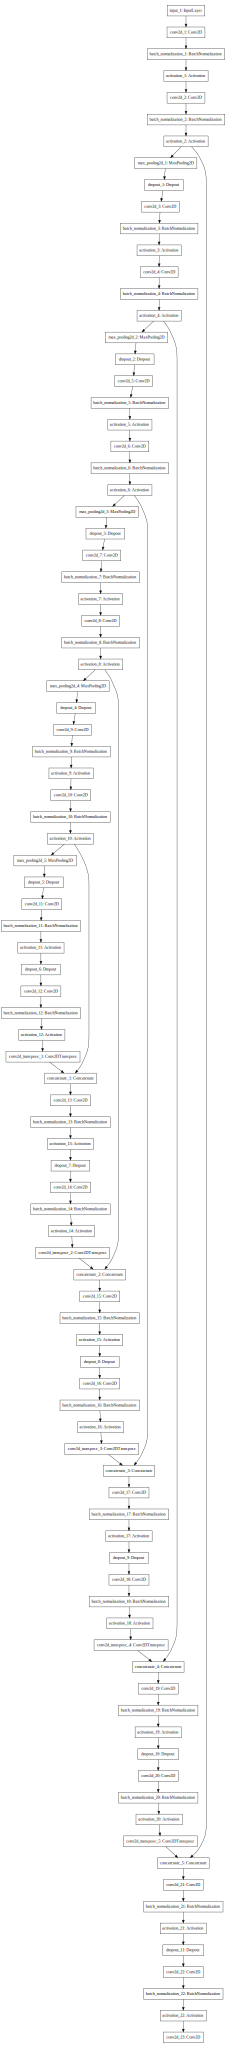

In [53]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='./output/model_step2.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))